In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset_after_preprocessing.csv')

In [3]:
# Membuat kolom stay_duration
df['stay_duration'] = df['stays_in_weekdays_nights'] + df['stays_in_weekend_nights']

In [4]:
# Melihat sebaran data kolom stay_duration
df['stay_duration'].describe()

count    119386.000000
mean          3.427914
std           2.557444
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: stay_duration, dtype: float64

In [5]:
# Mengelompokkan value pada kolom stay_duration
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70]

stay_duration_group = pd.cut(df['stay_duration'], bins=bin_edges, right=False, labels=[f"{i}-{i+9}" for i in range(0, 70, 10)])
df['stay_duration'] = stay_duration_group

### Perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel

In [6]:
# Membuat tabel agregat
canceled_bookings= pd.pivot_table(df,
                                  index=['hotel', 'stay_duration'],
                                  values=['total_guests', 'is_canceled'],
                                  aggfunc={'total_guests' : ['sum'], 
                                           'is_canceled' : ['sum']}
                                ).reset_index()
canceled_bookings.columns = ['hotel', 'stay_duration', 'is_canceled', 'total_bookings']

# Menambahkan kolom ratio pembatalan booking
canceled_bookings['cancellation_ratio'] = round(canceled_bookings['is_canceled'] / canceled_bookings['total_bookings'] * 100, 1)
canceled_bookings['cancellation_ratio'].fillna(value=0, inplace=True)
canceled_bookings

,hotel,stay_duration,is_canceled,total_bookings,cancellation_ratio
0,City Hotel,0-9,32691,153215.0,21.3
1,City Hotel,10-19,345,1130.0,30.5
2,City Hotel,20-29,52,102.0,51.0
3,City Hotel,30-39,10,20.0,50.0
4,City Hotel,40-49,0,2.0,0.0
5,City Hotel,50-59,0,0.0,0.0
6,City Hotel,60-69,0,0.0,0.0
7,Resort Hotel,0-9,10404,75144.0,13.8
8,Resort Hotel,10-19,645,5049.0,12.8
9,Resort Hotel,20-29,67,280.0,23.9


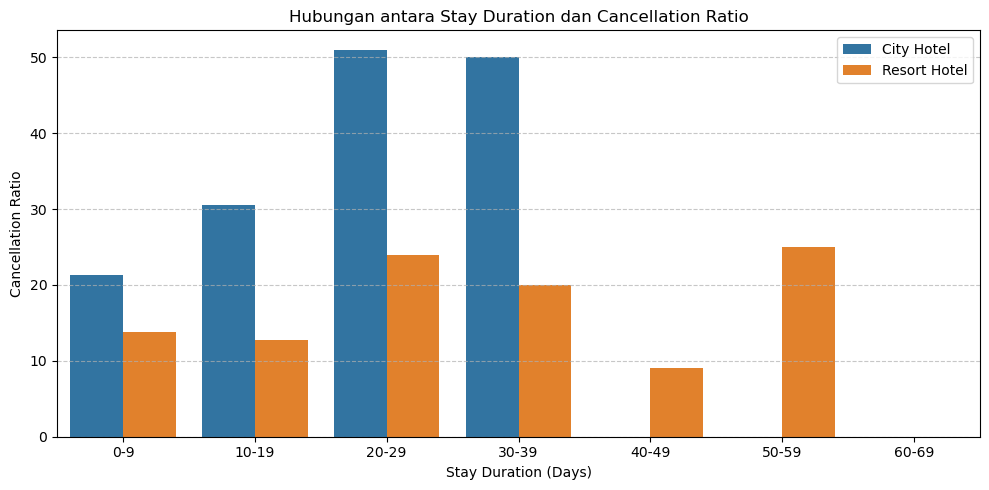

In [21]:
plt.figure(figsize=(10, 5))

sns.barplot(data=canceled_bookings, x='stay_duration', y='cancellation_ratio', hue='hotel')

plt.title('Hubungan antara Stay Duration dan Cancellation Ratio')
plt.xlabel('Stay Duration (Days)')
plt.ylabel('Cancellation Ratio')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Dari visualisasi di atas dapat disimpulkan bahwa pengunjung dengan lama menginap (*Stay Duration*) antara 20-29 hari memiliki tingkat pembatalan booking (*Cancellation Ratio*) tertinggi baik untuk City Hotel maupun Resort Hotel, yaitu sebesar 51% untuk City Hotel dan 23.9% untuk Resort Hotel.

Walaupun pengunjung Resort Hotel dengan *Stay Duration* 50-59 hari terlihat memiliki *Cancellation Ratio* yang tinggi, namun jumlah pengunjung dengan lama menginap sebanyak ini hanya berjumlah 4 orang sehingga belum bisa dikatakan valid.